Задание 1
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.


In [10]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
#генерируем случайные х и у
delta = 1.0
x = linspace(-10,10,20)
y = x**3+delta*(rand(20))
x += delta*(rand(20))
#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')
print(x)
print(y)



[-9.82136998 -8.68751634 -7.25172838 -6.16205281 -5.44936862 -4.35660101
 -3.09458517 -2.04824566 -1.03737531  0.10894331  0.66139975  2.36511756
  3.11293576  4.32437035  5.02673421  6.17524751  7.45884048  8.68802386
  9.56279843 10.08342562]
[-9.99637232e+02 -7.15325155e+02 -4.91804991e+02 -3.20197563e+02
 -1.93438190e+02 -1.05496074e+02 -4.91164396e+01 -1.72917769e+01
 -3.08736408e+00  3.28369362e-02  4.52210277e-01  3.96748969e+00
  1.82646422e+01  5.06689142e+01  1.06307786e+02  1.95037956e+02
  3.21294429e+02  4.92553315e+02  7.16756106e+02  1.00079813e+03]


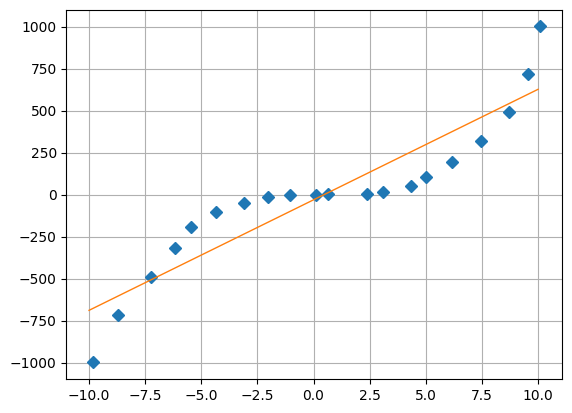

In [11]:
# Нахождение коэффициентов функции вида у = bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()

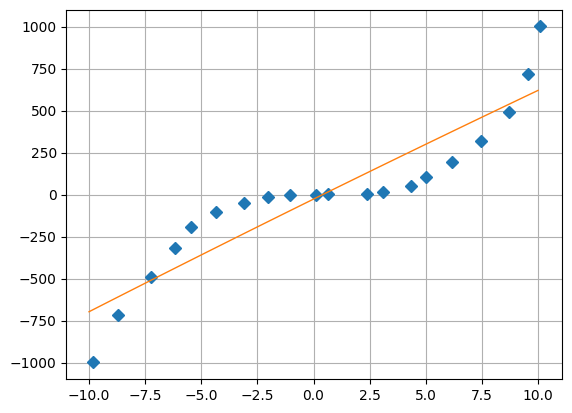

In [12]:
m = vstack((x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10,10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],"-", lw=1)
plt.grid()


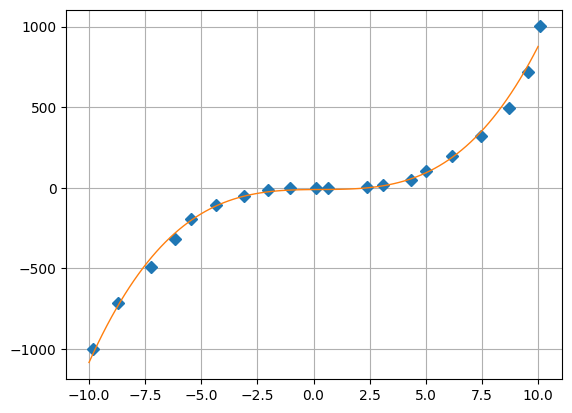

In [13]:
m = vstack((x**3,x**2, x, ones(20))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем крибую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2+x_prec*s[2]+s[3],"-", lw=1)
plt.grid()


2 задание 
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.


In [14]:
from scipy.optimize import curve_fit 
import scipy

In [15]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75) 
def f(x, be, b1):
    return be + b1*x
# зададим массив точек xі 
xdata=np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уі (без шума)
y=f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.26747822 0.74567678]
0.00022387449748534775
0.11879583294368024


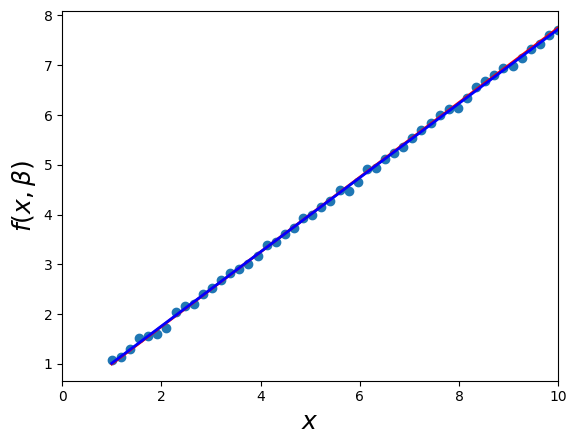

In [16]:
fig, ax = plt.subplots()
ax. scatter(xdata, ydata) 
ax. plot(xdata, y, 'r', lw=2) 
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

[0.2093955  0.75554634 0.49990577]
0.0005417201571731866


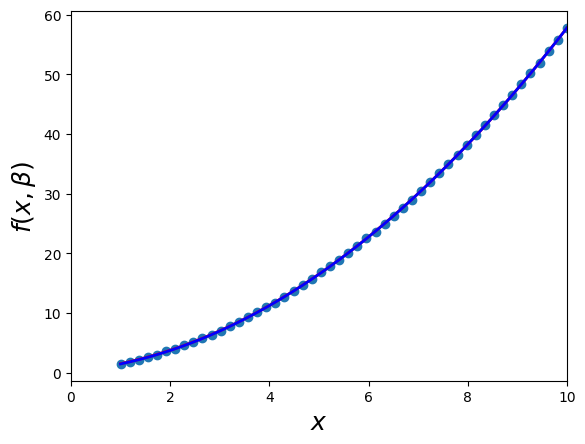

In [17]:
#решение #2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b - (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5) 
def f(x, be, b1, b2): 
    return be + b1 * x + b2 * x * x
# зададим массив точек xі
xdata = np.linspace(1, 10, 50) # создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta) # зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres - sum(residuals**2) print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2) 
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt. show()

[0.98770789 2.01940555]
0.0001406776734905443


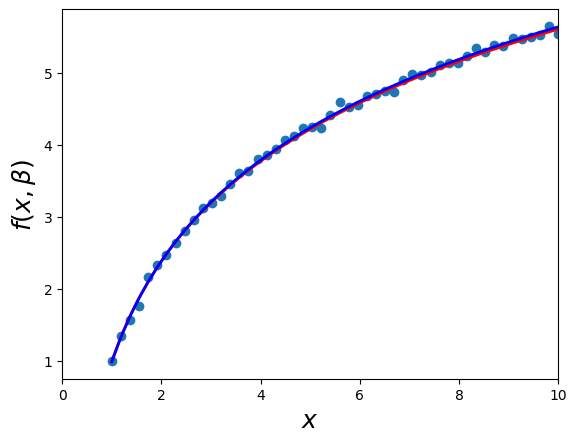

In [18]:
#решение #3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xі 
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt) #Вычислим линейное отклонение
lin_dev = sum(beta_cov[0]) 
print(lin_dev)
#Вычислим квадратичное отклонение residuals = ydata - f(xdata, *beta_opt) fres = sum(residuals**2) print(fres)
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax. plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

In [19]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2) 
beta = (1, 2) 
def f(x, be, b1):
    return be * x ** b1
# зададим массив точек xі
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata)) 
beta_opt, beta_cov = scipy.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.00323411 1.99834736]
1.3848697880157325e-06
0.1256706285504681


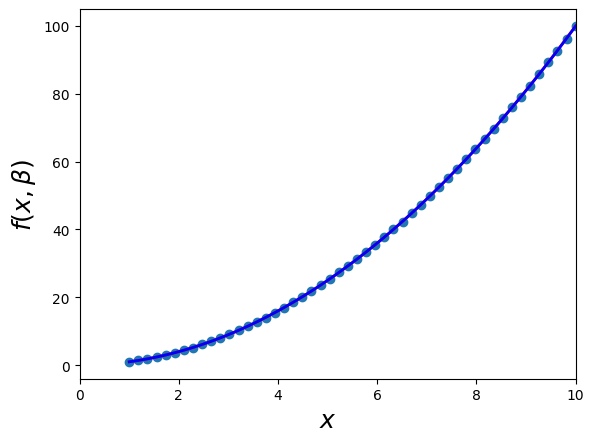

In [20]:
fig, ax = plt.subplots() 
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax. plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 10) 
ax.set_xlabel(r"$x$", fontsize=18) 
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18) 
plt.show()

3 задание 
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

(30, 2)


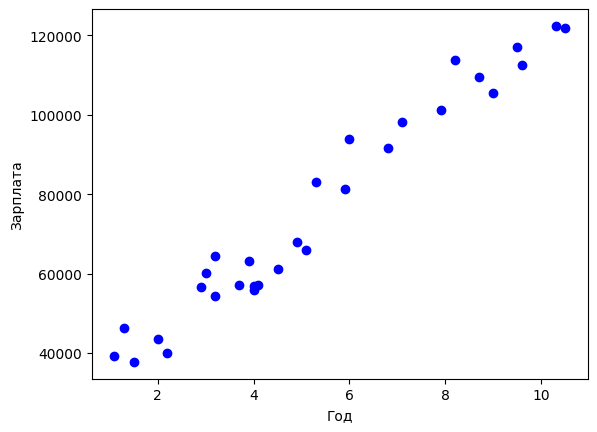

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


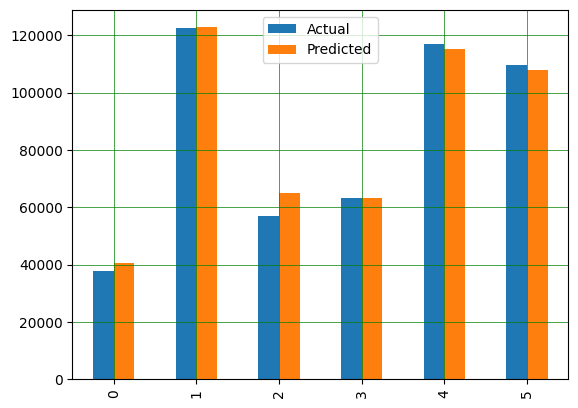

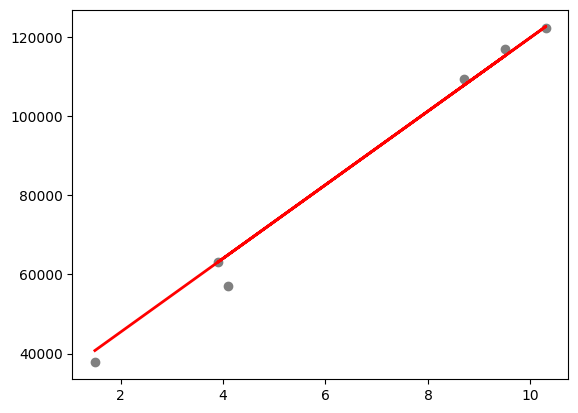

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Набор данных для описания взаимодействия Времени работы и зарплаты
my_dict = pd.read_csv("https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv")

#Исследуем набо данных
dataset = pd.DataFrame(my_dict)
dataset.head()

print(dataset.shape)
dataset.describe()

plt.scatter (dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "Данные ЗП и количества лет" )
plt.xlabel("Год") 
plt.ylabel("Зарплата") 
plt.show()

X = my_dict.iloc[:, :-1].values
y = my_dict.iloc[:, 1].values
print(X)
print(y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на а обучающий и тестовый наборы.

# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# далее можно обучить алгоритм линейной регрессии # необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit() 
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test)

# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 

# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which="major", linestyle="-",linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#построим линию регрессии с тестовыми данными 
plt.scatter(X_test, y_test, color='gray') 
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()
df

4 задание 
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv


In [22]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

dataframe = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [23]:
x = dataframe.drop('quality',axis = 1)
y = dataframe['quality']

#формируем DataFrames из двух списков
new_y = np.array(y)
df1 = pd.DataFrame(new_y)

new_x = np.array(x)
df2 = pd.DataFrame(new_x)

df1 = df1.rename(columns = {0: 'y'}, inplace = False) 
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3', 3: 'x4',4: 'x5',5: 'x6', 6: 'x7', 7: 'x8', 8: 'x9',9: 'x10',10: 'x11'}, inplace = False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner") 
dataframe.head(1600)

print(dataframe.shape)
dataframe.describe()

# разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3','x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']] 
y = dataset['y']

# разделим данные на обучающую и тестовую выборки 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

#для обучения используем линейную регрессию
regressor = LinearRegression() 
regressor.fit(x_train, y_train)

#выведем коэффициенты модели 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient']) 
print(coeff_df)

#Делаем прогнозы на тестовых данных 
y_pred = regressor.predict(x_test) 
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
print(df)

#Оцениваем производительность алгоритма. MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))


(1599, 12)
     Coefficient
x1      0.035559
x2     -1.154577
x3     -0.329490
x4      0.019899
x5     -1.853738
x6      0.004765
x7     -0.003350
x8    -19.113372
x9     -0.428013
x10     0.936927
x11     0.279183
      Actual  Predicted
1508       6   5.917241
718        5   5.310312
1370       5   4.843599
579        6   5.701594
498        8   6.128786
...      ...        ...
317        6   5.379581
608        6   5.300969
843        5   4.879195
127        5   4.706353
1143       6   5.947842

[320 rows x 2 columns]
Mean Squared Error: 0.39390859087169117


5 задание *
Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.



6 вариант 
x y
4,0 4,0
4,2 3,0
4,4 6,0
4,6 6,0
4,8 4,0
5,0 4,0

[4.  4.2 4.4 4.6 4.8 5. ]
[4. 3. 6. 6. 4. 4.]


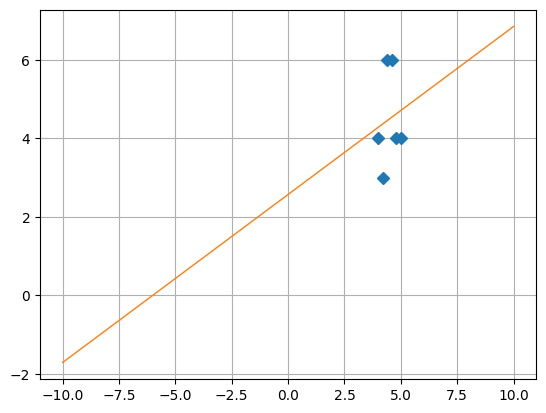

In [26]:
from numpy import *
from numpy.random import *
import numpy as np
import matplotlib.pyplot as plt
x = fromfile('x.txt', float, sep='\n')
y = fromfile('y.txt', float, sep='\n')
print(x)
print(y)
# Нахождение коэффициентов функции вида у = bx + с методом наименьших квадратов # задаем вектор т = [x**2, x, E]
m = vstack((x, ones(6))).T # находим коэффициенты при составляющих вектора т
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-10, 10, 101)
# рисуем точки
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec+s[1],"-", lw=1)
plt.grid()

